<a href="https://colab.research.google.com/github/Kemar73/Data-analysis-task/blob/master/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Kaggle : https://www.kaggle.com/jeanmidev/crossfit-games#2019_games_athletes.csv

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/2019_games_athletes.csv')

In [0]:
df.head()

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men


We only keep columns that we could need

In [0]:
# Remove some columns
cols=['height','countryoforiginname','weight','affiliatename','gender','age','countryoforigincode','overallrank','overallscore','division']
df.drop(df.columns.difference(cols), axis=1, inplace=True)

In [0]:
df.head()

,height,countryoforiginname,weight,affiliatename,gender,age,countryoforigincode,overallrank,overallscore,division
0,1.74,United States,88.5,CrossFit Mayhem,M,29,US,1,984.0,Men
1,1.74,United States,86.2,Peak 360 CrossFit,M,28,US,2,949.0,Men
2,1.55,Iceland,83.9,CrossFit Hengill,M,26,IS,3,888.0,Men
3,1.80,United States,84.8,CrossFit Mentality,M,31,US,4,795.0,Men
4,1.55,Australia,87.1,CrossFit Mode,M,28,AU,5,728.0,Men


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   countryoforiginname  394 non-null    object 
 2   weight               394 non-null    float64
 3   affiliatename        357 non-null    object 
 4   gender               394 non-null    object 
 5   age                  394 non-null    int64  
 6   countryoforigincode  393 non-null    object 
 7   overallrank          394 non-null    object 
 8   overallscore         391 non-null    float64
 9   division             394 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.9+ KB


In [0]:
# Merging dataframes
df_test = pd.DataFrame({
    'division':      ['Men', 'Men (35-39)','Men (40-44)','Men (45-49)','Men (50-54)','Men (55-59)','Men (60+)',
                      'Women', 'Women (35-39)','Women (40-44)','Women (45-49)','Women (50-54)','Women (55-59)','Women (60+)'],
    'sex': ['1','1','1','1','1','1','1','2','2','2','2','2','2','2'],
})
print(df_test)
# Inner join
df=df.merge(df_test)

         division sex
0             Men   1
1     Men (35-39)   1
2     Men (40-44)   1
3     Men (45-49)   1
4     Men (50-54)   1
5     Men (55-59)   1
6       Men (60+)   1
7           Women   2
8   Women (35-39)   2
9   Women (40-44)   2
10  Women (45-49)   2
11  Women (50-54)   2
12  Women (55-59)   2
13    Women (60+)   2


# Classification

As for the classification task, we are splitting the variable "countryoforiginname", which is about the home country of athletes, in 2 categories if they are from US or not.

## Data preparation


In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['C'] = df['countryoforiginname'].apply(lambda x: x if x == 'United States' else 'Non US')


# Train/test/validation split: 60%/20%/20%
train_indexes, test_indexes = train_test_split(df.index, test_size=0.2, random_state=100)
train_indexes, val_indexes = train_test_split(train_indexes, test_size=0.25, random_state=101)
X = df[[
    'height','weight','age','sex']].values
X = StandardScaler().fit_transform(X)
X_train, X_test, X_val = X[train_indexes], X[test_indexes], X[val_indexes]

le_users = LabelEncoder()
y_users = le_users.fit_transform(df['C'])
y_train, y_test, y_val = y_users[train_indexes], y_users[test_indexes], y_users[val_indexes]

In [0]:
# Plot training history
def plot_history(history, metric):
    plt.figure(figsize=(10, 5))
    plt.plot(history[metric], label='training')
    plt.plot(history[f'val_{metric}'], label='validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

## Model training and evaluation


In [0]:
# Define the model: simple neural network with one hidden layer (10 neurons)
# We have a binary classification problem, so the output layer consists of a single neuron.
# Note that the input layer (corresponding to the number of input features) is not explicitly added!
clf1 = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=(4,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf1.compile(
    # Stochastic gradient descent
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [0]:
# Train the model
res1 = clf1.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 25ms/step - loss: 0.6499 - accuracy: 0.6483 - val_loss: 0.6216 - val_accuracy: 0.7595
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6480 - accuracy: 0.6483 - val_loss: 0.6175 - val_accuracy: 0.7595
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.6483 - val_loss: 0.6138 - val_accuracy: 0.7595
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6446 - accuracy: 0.6525 - val_loss: 0.6109 - val_accuracy: 0.7595
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6432 - accuracy: 0.6525 - val_loss: 0.6070 - val_accuracy: 0.7595
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 0.6483 - val_loss: 0.6048 - val_accuracy: 0.7595
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6405 - accuracy: 0.6483 - val_loss: 0.6020 - val_accuracy: 0.7595
Epoch 8/100
8/8 [=========

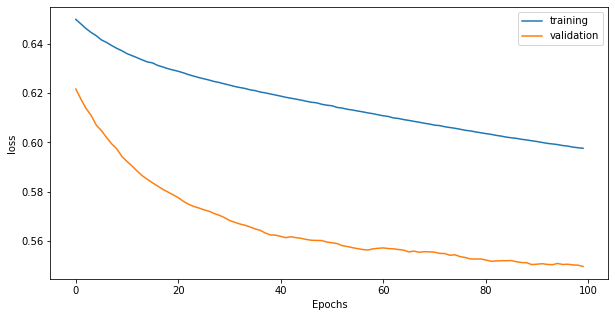

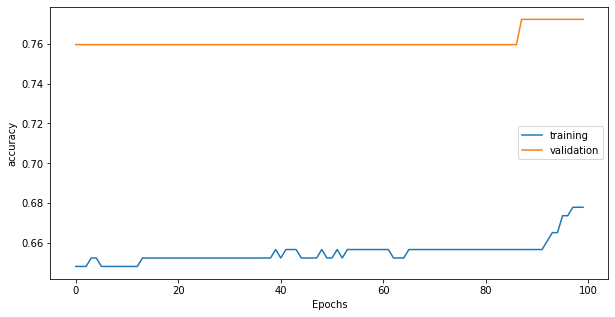

In [0]:
plot_history(res1.history, 'loss')
plot_history(res1.history, 'accuracy')

A loss function is used to optimize a machine learning algorithm. The loss is calculated on training and validation and its interpretation is based on how well the model is doing in these two sets. It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.

An accuracy metric is used to measure the algorithm’s performance in an interpretable way. The accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data


In [0]:
# Let's try a more complex model with two hidden layers and ReLU activation functions
clf2 = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(4,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf2.compile(
    # Stochastic gradient descent
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [0]:
# Train the model
res2 = clf2.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200)

Epoch 1/200
8/8 [==============================] - 0s 18ms/step - loss: 0.6885 - accuracy: 0.6186 - val_loss: 0.6646 - val_accuracy: 0.7342
Epoch 2/200
8/8 [==============================] - 0s 28ms/step - loss: 0.6839 - accuracy: 0.6271 - val_loss: 0.6595 - val_accuracy: 0.7468
Epoch 3/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.6314 - val_loss: 0.6548 - val_accuracy: 0.7468
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.6610 - val_loss: 0.6505 - val_accuracy: 0.7468
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6695 - val_loss: 0.6473 - val_accuracy: 0.7595
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.6695 - val_loss: 0.6419 - val_accuracy: 0.7722
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6638 - accuracy: 0.6568 - val_loss: 0.6378 - val_accuracy: 0.7722
Epoch 8/200
8/8 [========

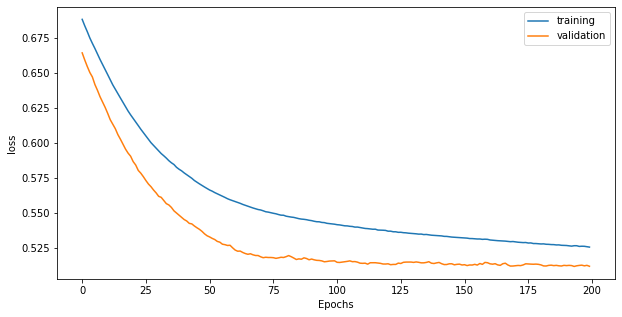

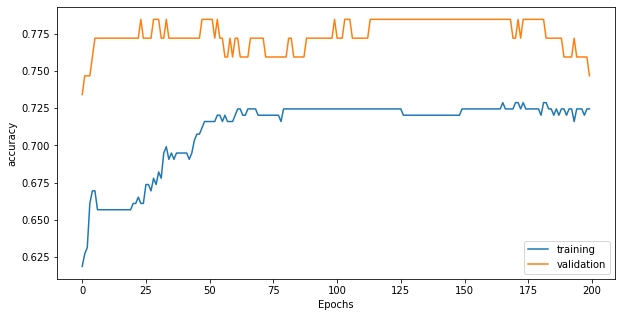

In [0]:
 plot_history(res2.history, 'loss')
plot_history(res2.history, 'accuracy')

In [0]:
# Even larger model
clf3 = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(4,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile it
clf3.compile(
    # Different optimizer this time
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [0]:
 res3 = clf3.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=400)

Epoch 1/400
8/8 [==============================] - 0s 7ms/step - loss: 0.3176 - accuracy: 0.8644 - val_loss: 0.8389 - val_accuracy: 0.7215
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 0.3074 - accuracy: 0.8517 - val_loss: 0.8361 - val_accuracy: 0.6582
Epoch 3/400
8/8 [==============================] - 0s 8ms/step - loss: 0.3120 - accuracy: 0.8475 - val_loss: 0.8519 - val_accuracy: 0.6582
Epoch 4/400
8/8 [==============================] - 0s 8ms/step - loss: 0.3032 - accuracy: 0.8644 - val_loss: 0.8334 - val_accuracy: 0.6835
Epoch 5/400
8/8 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.8517 - val_loss: 0.8244 - val_accuracy: 0.6709
Epoch 6/400
8/8 [==============================] - 0s 10ms/step - loss: 0.3153 - accuracy: 0.8475 - val_loss: 0.8237 - val_accuracy: 0.6709
Epoch 7/400
8/8 [==============================] - 0s 8ms/step - loss: 0.3042 - accuracy: 0.8644 - val_loss: 0.8328 - val_accuracy: 0.7089
Epoch 8/400
8/8 [=========

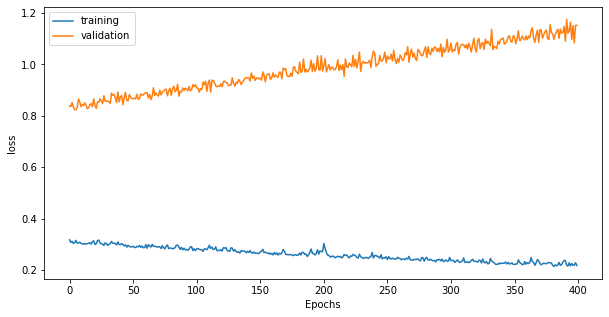

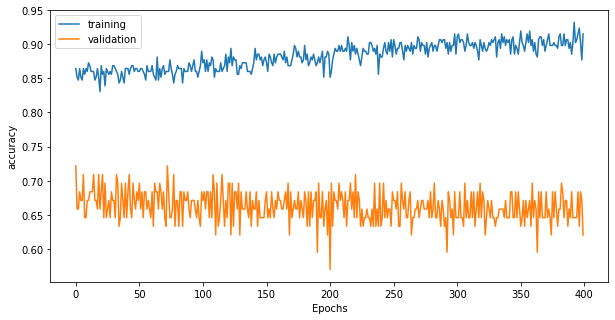

In [0]:
plot_history(res3.history, 'loss')
plot_history(res3.history, 'accuracy')

In [0]:
# Model performance with test dataset
clf1.evaluate(X_test, y_test)
clf2.evaluate(X_test, y_test)
clf3.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 2.4083 - accuracy: 0.7215


[2.40832781791687, 0.7215189933776855]

For each model, the accuracy is around 0,7. 
So we can say that around 70% of predicted labelsmatch with actual labels.

About loss, a loss of 0 would mean that the model's prediction is perfect. But we are not in this situation. But still, we have low loss. So we can say that, like we said previously, that the model's prediction is still pretty good.

In [0]:
# Model parameter counts
print(f'Model #1: {clf1.count_params()}')
print(f'Model #2: {clf2.count_params()}')
print(f'Model #3: {clf3.count_params()}')

Model #1: 61
Model #2: 541
Model #3: 10701


In [0]:
clf3.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 10,701
Trainable params: 10,701
Non-trainable params: 0
_________________________________________________________________


We reach the same conclusion that we made in the classification task : there is, indeed, a pretty big link between the sex, age, weight and height of an athlete and if he/she is from US or not.